In [1]:
%cat 0Source_Citation.txt

Source and citation

- This notebook is a part of the `pytheos` package.
- Website: http://github.com/SHDShim/pytheos.
- How to cite: S.-H. Shim (2017) Pytheos - a python tool set for equations of state. DOI: 10.5281/zenodo.802392


In [2]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [3]:
%config InlineBackend.figure_format = 'retina'

# 0. General note

This notebook shows how to calculate thermal pressure and associated terms in the constant q approach.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uct
from uncertainties import unumpy as unp
import pandas as pd
import pytheos as eos

# 1. Calculate Debye energy with uncertainties

Assign uncertainties to `x`. Note that:

$$ x = \dfrac{\theta}{T} $$

where $\theta$ is the Debye temperature.

In [5]:
x = unp.uarray(np.linspace(0.01,15.,20), np.ones(20)*0.5) # 0.1,7.25

In [6]:
energy = eos.debye_E(x)

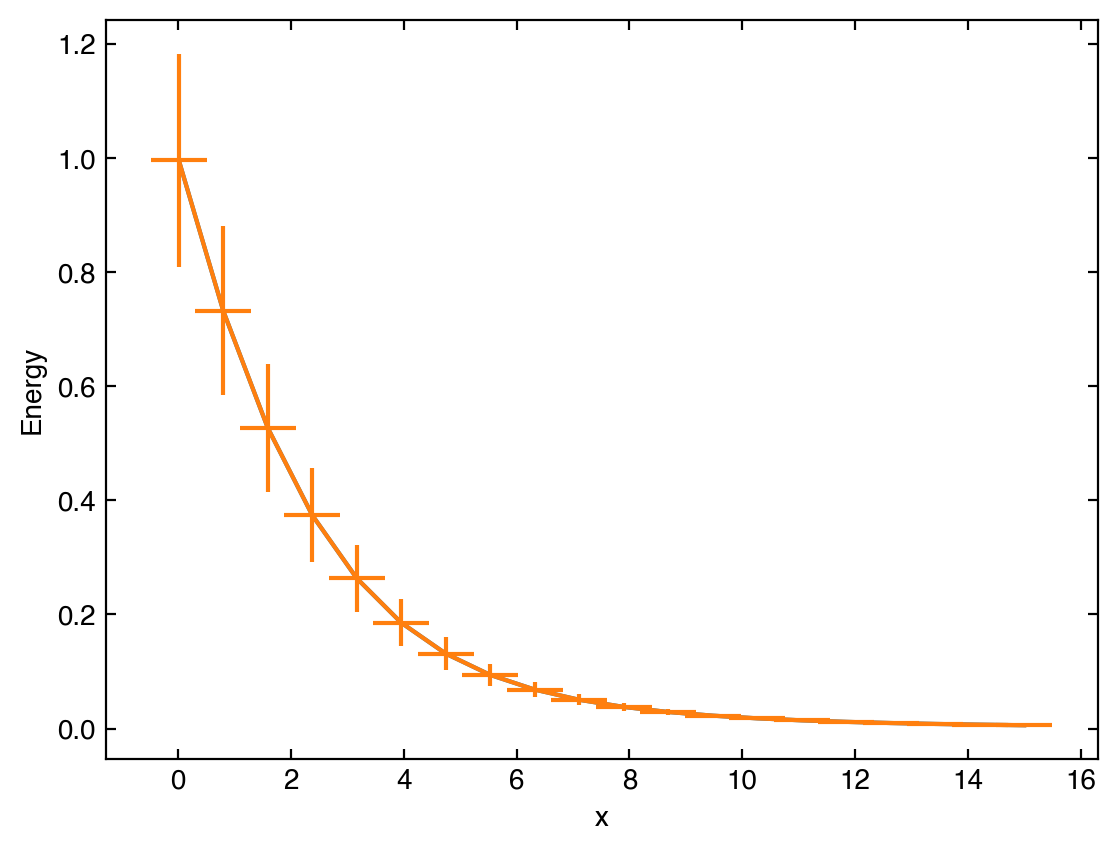

In [7]:
plt.plot(unp.nominal_values(x), unp.nominal_values(energy))
plt.xlabel('x'); plt.ylabel('Energy')
plt.errorbar(unp.nominal_values(x), unp.nominal_values(energy), 
             xerr = unp.std_devs(x), yerr = unp.std_devs(energy));

# 2. Calculate Gruneisen parameter

You may get some help on how to call the function using `help()` command.  `constq_grun` calculates Gruneisen $(\gamma)$ parameter with error propagation based on the following relation:

$$\dfrac{\gamma}{\gamma_0} = \left( \dfrac{V}{V_0} \right)^q$$

where $\gamma_0$ is the Gruneisen parameter at reference conditions and $V$ is the volume.  $q$ is the logarithmic volume dependence of Gruneisen parameter.

In [8]:
help(eos.constq_grun)

Help on function constq_grun in module pytheos.eqn_therm_constq:

constq_grun(v, v0, gamma0, q)
    calculate Gruneisen parameter for constant q

    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Grunseinen parameter
    :return: Gruneisen parameter at a given volume



Calculate Gruneisen parameter without error bar.

In [9]:
v0 = 162.3
v = np.linspace(v0, v0*0.8, 20)
grun = eos.constq_grun(v, v0, 1.5, 2)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\g'
/var/folders/hq/thm59xl964s5d51mg8d1jt1m0000gp/T/ipykernel_40046/2619446596.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');
/var/folders/hq/thm59xl964s5d51mg8d1jt1m0000gp/T/ipykernel_40046/2619446596.py:2: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');


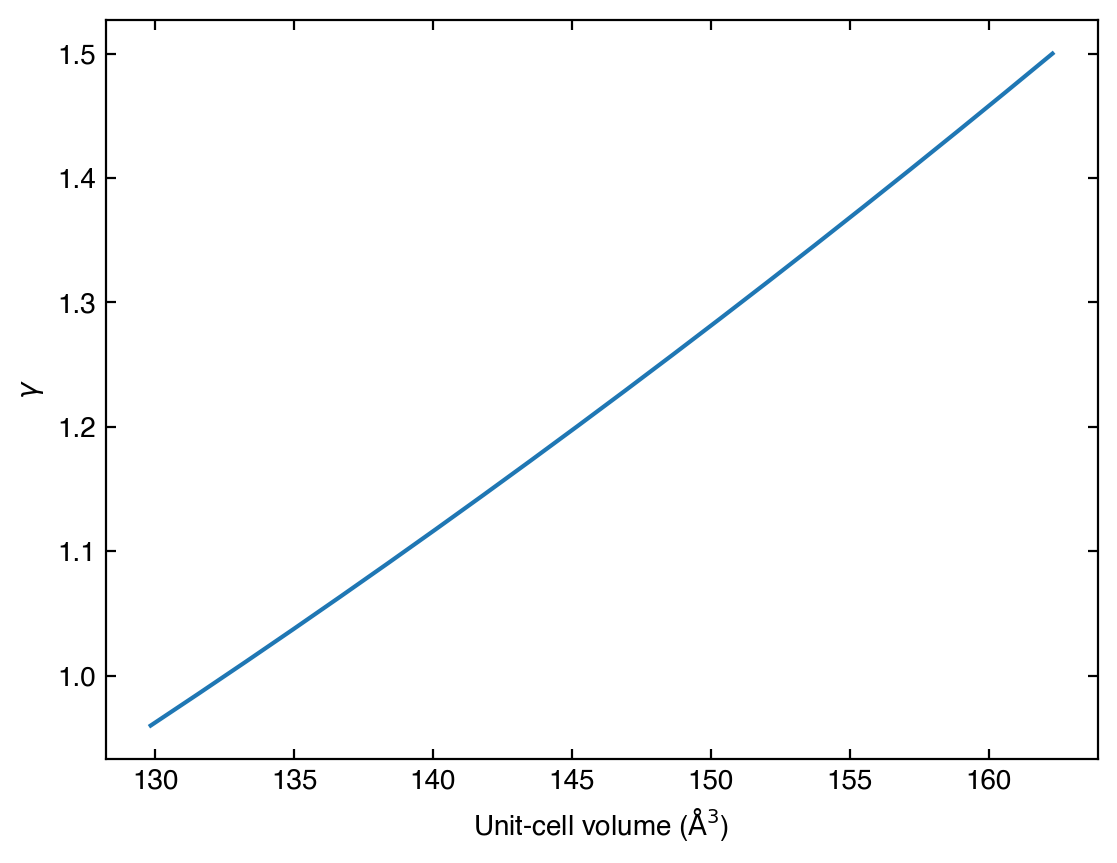

In [10]:
plt.plot(v, grun)
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');

The cell below shows how to do error propagation.

In [11]:
s_v = np.random.uniform(0., 0.1, 20)
v_u = unp.uarray(v, s_v)
gamma = eos.constq_grun(v_u, uct.ufloat(v0, 0.01), 
                        uct.ufloat(1.5, 0.1), uct.ufloat(2.,0.5))
gamma

array([1.5+/-0.10000017186881634,
       1.4685872576177283+/-0.09822566174390719,
       1.4375069252077564+/-0.09704938762186763,
       1.406759002770083+/-0.09646881543918315,
       1.3763434903047091+/-0.09642552266221192,
       1.3462603878116342+/-0.0968597898729191,
       1.3165096952908588+/-0.09771574781007908,
       1.287091412742382+/-0.09893971613551095,
       1.2580055401662051+/-0.10048323612625011,
       1.2292520775623266+/-0.10226608976817368,
       1.200831024930748+/-0.10426262056663066,
       1.1727423822714682+/-0.10639310316378181,
       1.1449861495844877+/-0.10864238453632744,
       1.1175623268698058+/-0.11096262166332115,
       1.0904709141274238+/-0.11331858021339862,
       1.0637119113573406+/-0.11568502734049074,
       1.0372853185595567+/-0.1180339821728948,
       1.0111911357340722+/-0.1203463806428945,
       0.9854293628808866+/-0.12260093808247084,
       0.9599999999999999+/-0.12477991280360977], dtype=object)

If you need a pretty table.

In [12]:
df = pd.DataFrame()
df['volume'] = v_u
df['gamma'] = gamma
df
# print(df.to_string(index=False))

,volume,gamma
0,162.3000+/-0.0008,1.50+/-0.10
1,160.59+/-0.08,1.47+/-0.10
2,158.88+/-0.04,1.44+/-0.10
3,157.17+/-0.07,1.41+/-0.10
4,155.47+/-0.09,1.38+/-0.10
5,153.76+/-0.08,1.35+/-0.10
6,152.05+/-0.06,1.32+/-0.10
7,150.341+/-0.019,1.29+/-0.10
8,148.63+/-0.07,1.26+/-0.10
9,146.924+/-0.033,1.23+/-0.10


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\g'
/var/folders/hq/thm59xl964s5d51mg8d1jt1m0000gp/T/ipykernel_40046/2051953494.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');
/var/folders/hq/thm59xl964s5d51mg8d1jt1m0000gp/T/ipykernel_40046/2051953494.py:4: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');


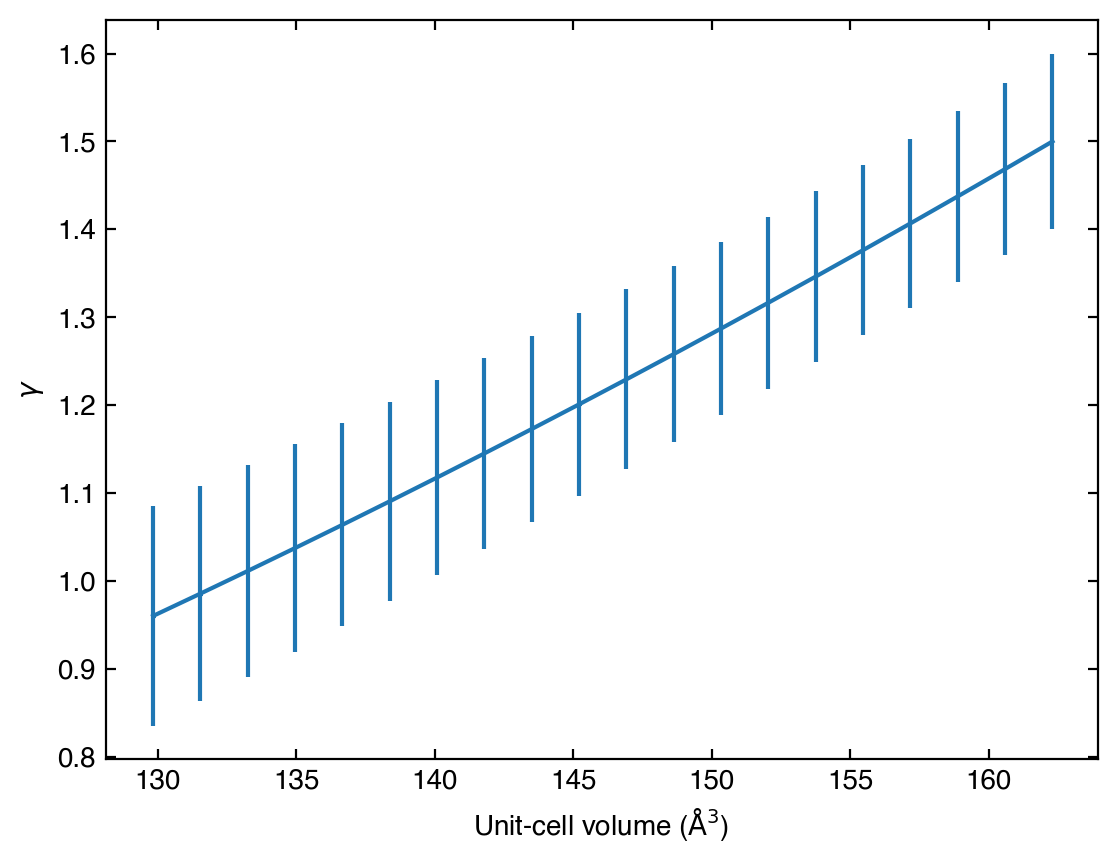

In [13]:
plt.errorbar(unp.nominal_values(v_u), 
             unp.nominal_values(gamma), xerr=unp.std_devs(v_u), 
             yerr=unp.std_devs(gamma))
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');

You do not need to provide uncertainties for all the parameters.  The cell below shows a case where we do not have error bars for the parameters.  In this case, we have uncertainties for volume.

In [14]:
eos.constq_grun(v_u, v0, 1.5, 2.)

array([1.5+/-1.43840608185621e-05,
       1.4685872576177283+/-0.0015231883586794112,
       1.4375069252077564+/-0.0007442506318085518,
       1.406759002770083+/-0.0011659146702115782,
       1.3763434903047091+/-0.0015126625608671079,
       1.3462603878116342+/-0.001435621904106919,
       1.3165096952908588+/-0.0009880576301979863,
       1.287091412742382+/-0.00031730392005912633,
       1.2580055401662051+/-0.0012166150593984624,
       1.2292520775623266+/-0.0005569566283557073,
       1.200831024930748+/-0.001422377132430801,
       1.1727423822714682+/-0.00010701228426293203,
       1.1449861495844877+/-0.00029426809803054097,
       1.1175623268698058+/-0.0004691195977886015,
       1.0904709141274238+/-7.071262035396199e-05,
       1.0637119113573406+/-0.0005578489131169221,
       1.0372853185595567+/-0.0007103331076140025,
       1.0111911357340722+/-0.0010955551325418135,
       0.9854293628808866+/-0.001325693537525833,
       0.9599999999999999+/-0.0013019958922420535]

# 3. Calculate Debye temperature and thermal pressure

You can get the Debye temperatures with error bars.

In [15]:
help(eos.constq_debyetemp)

Help on function constq_debyetemp in module pytheos.eqn_therm_constq:

constq_debyetemp(v, v0, gamma0, q, theta0)
    calculate Debye temperature for constant q

    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar
    :return: Debye temperature in K



In [16]:
eos.constq_debyetemp(v_u, v0, 1.5, 2., 1000.)

array([1000.0+/-0.00719203040928105,
       1015.8303645504885+/-0.7736504928381833,
       1031.7398349865637+/-0.3839365120254004,
       1047.7243207919184+/-0.6107785779743797,
       1063.7796300436687+/-0.8045698096900602,
       1079.901470649432+/-0.7751651027707999,
       1096.0854516873335+/-0.5414977969443381,
       1112.327084849175+/-0.17647287220529187,
       1128.6217859868752+/-0.6865491305984106,
       1144.964876762185+/-0.31884788867358727,
       1161.351586399536+/-0.8259399696034667,
       1177.777053541791+/-0.06301830642598633,
       1194.2363282085053+/-0.17571282645044684,
       1210.7243738562106+/-0.2839872656481409,
       1227.2360695400907+/-0.04339053913503847,
       1243.7662121763+/-0.3469168148170501,
       1260.309518904035+/-0.4476197885593058,
       1276.860629546358+/-0.6994356081200418,
       1293.414109168624+/-0.8573353629347887,
       1309.9644507332475+/-0.852784166918903], dtype=object)

You can get thermal pressures with error bars.

In [17]:
help(eos.constq_pth)

Help on function constq_pth in module pytheos.eqn_therm_constq:

constq_pth(v, temp, v0, gamma0, q, theta0, n, z, t_ref=300.0, three_r=24.94338785445972)
    calculate thermal pressure for constant q

    :param v: unit-cell volume in A^3
    :param temp: temperature
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature in K
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature
    :param three_r: 3R in case adjustment is needed
    :return: thermal pressure in GPa



In [18]:
p_th = eos.constq_pth(v_u, unp.uarray(np.ones_like(v)*2000., np.ones_like(v)*100), v0, 1.5, 2., 1000., 5, 4)
p_th

array([12.07062345118262+/-0.7561240890437284,
       11.917516600916256+/-0.7479053181613637,
       11.764625317033763+/-0.739621680855408,
       11.611970311429186+/-0.7313806509957201,
       11.459572328752907+/-0.7231434074714835,
       11.30745210851144+/-0.7148873426044745,
       11.155630347098576+/-0.7066163684485334,
       11.004127659887626+/-0.6983496958232381,
       10.852964543512234+/-0.6901282719276489,
       10.702161338460087+/-0.6818585910220059,
       10.551738192100196+/-0.6736501731468598,
       10.401715022259717+/-0.6653658747012676,
       10.252111481461501+/-0.6571281700380431,
       10.10294692192763+/-0.6488948849636068,
       9.954240361448367+/-0.640656751124204,
       9.806010450209152+/-0.6324345494675443,
       9.658275438661684+/-0.6242137319481865,
       9.511053146517778+/-0.616010354604854,
       9.364360932937396+/-0.6078087266861759,
       9.218215667974805+/-0.5995954521545843], dtype=object)

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/hq/thm59xl964s5d51mg8d1jt1m0000gp/T/ipykernel_40046/1607228588.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('Thermal pressure (GPa)');


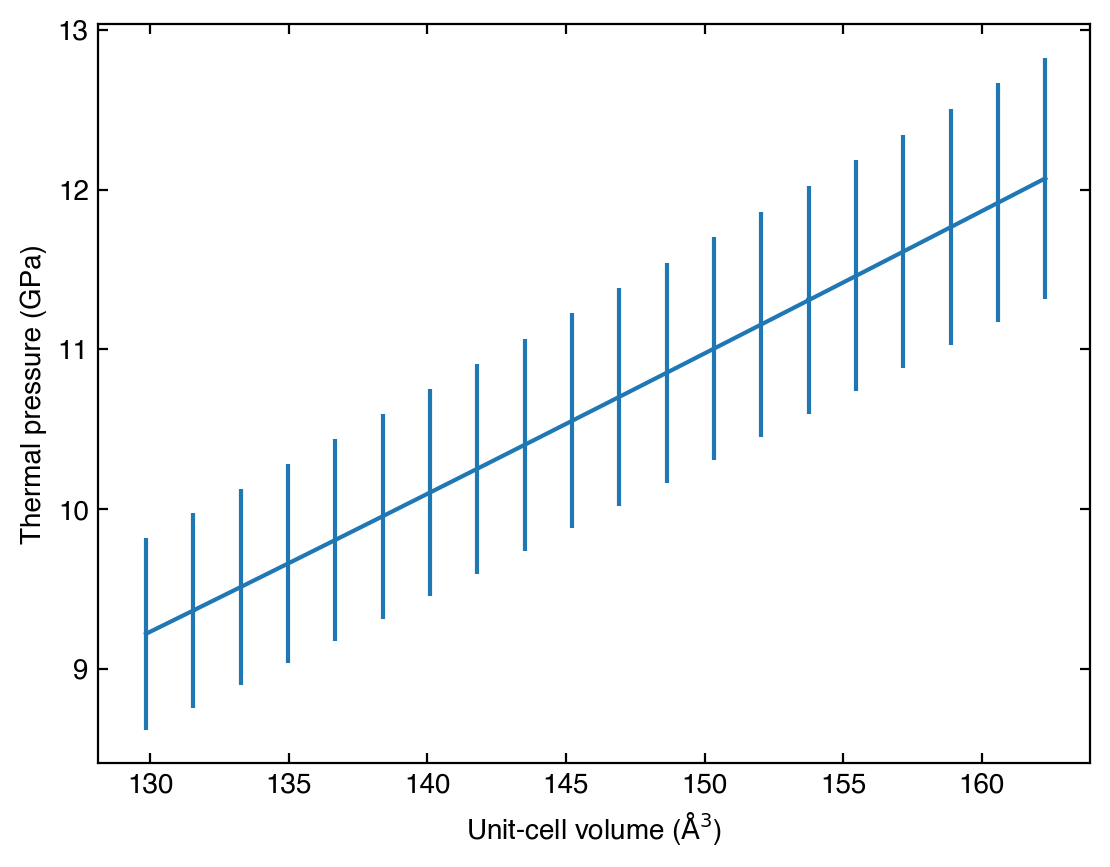

In [19]:
plt.errorbar(unp.nominal_values(v_u), unp.nominal_values(p_th),
            xerr=unp.std_devs(v_u), yerr=unp.std_devs(p_th))
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('Thermal pressure (GPa)');